# Load Libraries

In [1]:
!wget https://www.spataru.at/students/course_files/week2/adult_rev2.csv

--2020-11-02 08:40:57--  https://www.spataru.at/students/course_files/week2/adult_rev2.csv
Resolving www.spataru.at (www.spataru.at)... 81.19.159.92
Connecting to www.spataru.at (www.spataru.at)|81.19.159.92|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3595716 (3,4M) [text/csv]
Saving to: ‘adult_rev2.csv.2’

adult_rev2.csv.2    100%[===================>]   3,43M   358KB/s    in 11s     

2020-11-02 08:41:09 (307 KB/s) - ‘adult_rev2.csv.2’ saved [3595716/3595716]



In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

**Load the data in a variable named df** Q1

The file path is "adult_rev2.csv"

In [3]:
df = pd.read_csv("adult_rev2.csv")

**How many rows and columns does the data have?** Q1

df.shape > (rows,columns)

In [4]:
df.shape

(32761, 15)

**Show the first 5 rows of the data**

In [5]:
df.head()

,social_number,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,717703,90,NaN,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,931778,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,176143,66,NaN,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,953541,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,523037,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


**Drop the duplicates in the data** Q2

Note: replace the current df (dataframe) with the clean df

In [6]:
df = df.drop_duplicates()

**How many rows are left?** Q2

In [7]:
df.shape

(32589, 15)

**How many values are there in missing in the column workclass?** Q3

In [8]:
df.workclass.isna().sum()

1837

**Drop all missing values** Q4

Note: replace the current df (dataframe) with the clean df

In [9]:
df = df.dropna()

**How many rows are left?** Q4

In [10]:
df.shape

(30189, 15)

**Is the income column inconsistent? Then fix it** D

In [11]:
df.income.value_counts()

<=50K            21521
>50K              5871
less than 50k     1144
more than 50k      923
over 50k           730
Name: income, dtype: int64

In [12]:
df[df.income == 'less than 50k']

,social_number,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
5,970285,34,Private,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,less than 50k
22,357138,61,Private,HS-grad,9,Divorced,Sales,Unmarried,White,Female,0,2754,25,United-States,less than 50k
125,598796,27,Private,Some-college,10,Married-civ-spouse,Adm-clerical,Wife,Black,Female,0,2377,20,United-States,less than 50k
207,771511,35,Private,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,2205,40,United-States,less than 50k
247,872782,35,Private,11th,7,Married-civ-spouse,Craft-repair,Husband,White,Male,0,2057,40,United-States,less than 50k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32473,209710,66,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,0,25,United-States,less than 50k
32595,106856,21,Private,11th,7,Never-married,Priv-house-serv,Other-relative,White,Female,0,0,40,Mexico,less than 50k
32616,549017,25,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Female,0,0,40,United-States,less than 50k
32624,319058,45,State-gov,Some-college,10,Married-spouse-absent,Other-service,Other-relative,Black,Male,0,0,40,Haiti,less than 50k


In [13]:
df[df.income == 'less than 50k'].index

Int64Index([    5,    22,   125,   207,   247,   322,   335,   341,   992,
             1041,
            ...
            32403, 32406, 32411, 32429, 32471, 32473, 32595, 32616, 32624,
            32748],
           dtype='int64', length=1144)

In [14]:
less_than = df[df.income == 'less than 50k'].index
less_than

Int64Index([    5,    22,   125,   207,   247,   322,   335,   341,   992,
             1041,
            ...
            32403, 32406, 32411, 32429, 32471, 32473, 32595, 32616, 32624,
            32748],
           dtype='int64', length=1144)

In [15]:
df.loc[less_than, 'income'] 

5        less than 50k
22       less than 50k
125      less than 50k
207      less than 50k
247      less than 50k
             ...      
32473    less than 50k
32595    less than 50k
32616    less than 50k
32624    less than 50k
32748    less than 50k
Name: income, Length: 1144, dtype: object

In [16]:
df.loc[less_than, 'income'] = '<=50K'


In [17]:
df[df.income.isin(['over 50k', 'more than 50k'])]

,social_number,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
7,643429,74,State-gov,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,more than 50k
12,582898,52,Private,Bachelors,13,Widowed,Other-service,Not-in-family,White,Female,0,2824,20,United-States,over 50k
28,347347,37,Self-emp-inc,10th,6,Never-married,Transport-moving,Not-in-family,White,Male,0,2559,50,United-States,more than 50k
29,289235,38,Private,10th,6,Never-married,Prof-specialty,Not-in-family,White,Male,0,2559,90,United-States,over 50k
40,115219,44,Private,Bachelors,13,Divorced,Exec-managerial,Unmarried,White,Male,0,2547,50,United-States,more than 50k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32638,432094,43,Federal-gov,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,Philippines,over 50k
32720,872864,61,Private,HS-grad,9,Separated,Transport-moving,Unmarried,Asian-Pac-Islander,Male,0,0,45,United-States,over 50k
32727,623828,45,Self-emp-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,over 50k
32732,722254,52,Self-emp-inc,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,15024,0,50,United-States,more than 50k


In [18]:
more_than = df[df.income.isin(['over 50k', 'more than 50k'])].index

In [19]:
df.loc[more_than, 'income'] = '>50K'


In [20]:
df.income.value_counts()

<=50K    22665
>50K      7524
Name: income, dtype: int64

**Drop social number.** Q5

In [21]:
df =  df.drop(["social_number"], axis=1)

In [22]:
df.shape

(30189, 14)

**Describe Age** D

In [23]:
df.age.describe()

count    30189.000000
mean        38.441949
std         13.135234
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64

**Determine the mean of the column "hours.per.week"** D

In [24]:
df.hours_per_week.describe()

count    30189.000000
mean        40.931432
std         11.976770
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours_per_week, dtype: float64

In [25]:
df.hours_per_week.median()

40.0

In [26]:
df.hours_per_week.mean()

40.93143197853523

In [27]:
df.hours_per_week.max()

99

In [28]:
df.hours_per_week.min()

1

In [29]:
df.hours_per_week.std()

11.976770259321153

**What is the diference between mean and median on capital gain?** Q7

In [30]:
df.capital_gain.mean() - df.capital_gain.median()

1092.778859849614

**How many unique workclasses?** D

In [31]:
df.workclass.unique()

array(['Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay'], dtype=object)

**How many different types of education are there?** D

In [32]:
df.education.nunique()

16

**How many people are divorced?** Q

In [33]:
df.marital_status.value_counts()

Married-civ-spouse       14085
Never-married             9730
Divorced                  4215
Separated                  940
Widowed                    827
Married-spouse-absent      371
Married-AF-spouse           21
Name: marital_status, dtype: int64

**Answer: 4214**

**Histogram Age** D

<AxesSubplot:>

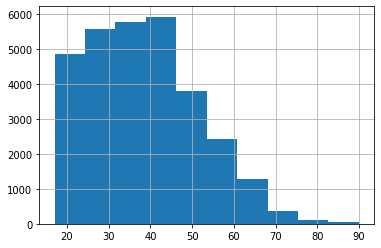

In [34]:
df.age.hist()

**Create a countplot for martial status** D

<AxesSubplot:>

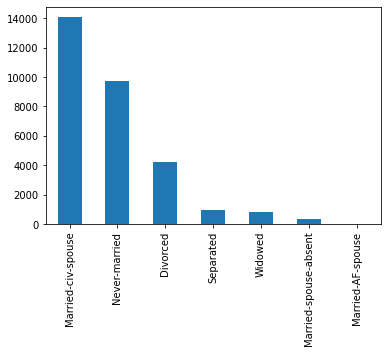

In [35]:
df.marital_status.value_counts().plot(kind="bar")

**How many Salesperson make a capital gain of over 80000?** D

Solution A

In [36]:
df[df.capital_gain >80000]

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
1519,54,Self-emp-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
1520,52,Private,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,99999,0,40,Japan,>50K
1521,53,Self-emp-inc,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,99999,0,40,United-States,>50K
1522,52,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,50,United-States,>50K
1523,46,Private,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1672,22,Self-emp-not-inc,Some-college,10,Never-married,Sales,Own-child,Black,Male,99999,0,55,United-States,>50K
1673,47,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,55,United-States,>50K
1674,43,Self-emp-inc,Prof-school,15,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,40,United-States,>50K
1676,47,Private,Prof-school,15,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,40,United-States,>50K


In [37]:
df[df.capital_gain >80000].occupation

1519     Prof-specialty
1520    Exec-managerial
1521              Sales
1522    Exec-managerial
1523     Prof-specialty
             ...       
1672              Sales
1673    Exec-managerial
1674    Exec-managerial
1676    Exec-managerial
1677       Craft-repair
Name: occupation, Length: 148, dtype: object

In [38]:
df[df.capital_gain >80000].occupation.value_counts()

Prof-specialty       65
Exec-managerial      38
Sales                24
Craft-repair          8
Adm-clerical          6
Other-service         2
Tech-support          1
Machine-op-inspct     1
Handlers-cleaners     1
Transport-moving      1
Protective-serv       1
Name: occupation, dtype: int64

Solution B

In [39]:
df[(df.occupation == "Sales") & (df.capital_gain > 80000)]

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
1521,53,Self-emp-inc,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,99999,0,40,United-States,>50K
1528,43,Self-emp-inc,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,99999,0,55,United-States,>50K
1529,65,Self-emp-inc,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,99999,0,60,United-States,>50K
1550,41,Self-emp-inc,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,99999,0,65,United-States,>50K
1552,33,Private,Doctorate,16,Divorced,Sales,Not-in-family,White,Male,99999,0,60,United-States,>50K
1553,36,Self-emp-not-inc,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,99999,0,20,United-States,>50K
1563,46,Private,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,99999,0,40,United-States,>50K
1566,32,Private,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,99999,0,60,United-States,>50K
1568,46,Self-emp-inc,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,99999,0,72,United-States,>50K
1590,62,Self-emp-inc,Bachelors,13,Divorced,Sales,Not-in-family,White,Male,99999,0,40,United-States,>50K


In [40]:
df[(df.occupation == "Sales") & (df.capital_gain > 80000)].shape[0]

24

**Answer: 24**

**How many rows have a capital loss and capital gain bigger than 0?** Q

In [41]:
df.shape

(30189, 14)

In [42]:
df[(df.capital_gain > 0) & (df.capital_loss > 0)]

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income


**Answer: 0**

**Create a feature which combines capital_loss and capital_gain** D

In [43]:
df["capital"] = df.capital_gain - df.capital_loss

**What is the mean capital?** D

In [44]:
df.capital.mean()

1004.4224055119414

**What is the median capital?** D

In [45]:
df.capital.median()

0.0

**How many people have a capital of 0?** Q

In [46]:
df[df.capital == 0].shape[0]

26219

**What is the percentage of people which make a capital gain of over 10000?** D

In [47]:
total_people_count = df.shape[0]

In [48]:
capital_gain_count = df[df.capital > 10000].shape[0]

In [49]:
capital_gain_count/total_people_count

0.02434661631720163

**What is the occupation of the biggest capital loss?** Q

Tip: Use min() or max()

In [50]:
df.loc[df.capital == df.capital.min(), "occupation"]

1    Exec-managerial
Name: occupation, dtype: object

**What is the ratio between <=50K income and >50K?** D

In [51]:
df.income.value_counts()

<=50K    22665
>50K      7524
Name: income, dtype: int64

In [52]:
df.income.value_counts()/df.shape[0]

<=50K    0.75077
>50K     0.24923
Name: income, dtype: float64

**How many people with a income >50K have a capital loss?** Q11

In [53]:
df[(df.income == ">50K") & (df.capital < 0)].shape[0]

738

**How many divorced people with a income >50K have a capital gain?** Q11

In [54]:
df[(df.income == ">50K") & (df.capital > 0) & (df.marital_status =="Divorced")].shape[0]

126

**Do a scatter plot between age and capital**

<AxesSubplot:xlabel='age', ylabel='capital'>

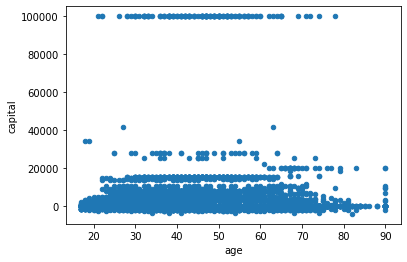

In [55]:
df.plot.scatter("age","capital")

**This look unreadable. Calculate the average capital by age** D

In [56]:
df.groupby("age").mean()

,education_num,capital_gain,capital_loss,hours_per_week,capital
age,,,,,
17,6.655488,24.932927,50.280488,20.378049,-25.347561
18,8.064877,122.917226,33.049217,25.167785,89.868009
19,9.050505,82.318182,40.983165,30.353535,41.335017
20,9.322734,42.279809,31.968203,32.381558,10.311606
21,9.393891,222.207395,54.136656,34.192926,168.070740
...,...,...,...,...,...
84,9.875000,0.000000,0.000000,25.875000,0.000000
85,10.333333,0.000000,0.000000,29.333333,0.000000
86,14.000000,0.000000,0.000000,40.000000,0.000000


In [57]:
df.groupby("age").mean().reset_index()

,age,education_num,capital_gain,capital_loss,hours_per_week,capital
0,17,6.655488,24.932927,50.280488,20.378049,-25.347561
1,18,8.064877,122.917226,33.049217,25.167785,89.868009
2,19,9.050505,82.318182,40.983165,30.353535,41.335017
3,20,9.322734,42.279809,31.968203,32.381558,10.311606
4,21,9.393891,222.207395,54.136656,34.192926,168.070740
...,...,...,...,...,...,...
67,84,9.875000,0.000000,0.000000,25.875000,0.000000
68,85,10.333333,0.000000,0.000000,29.333333,0.000000
69,86,14.000000,0.000000,0.000000,40.000000,0.000000
70,88,13.333333,0.000000,0.000000,40.000000,0.000000


<AxesSubplot:xlabel='age', ylabel='capital'>

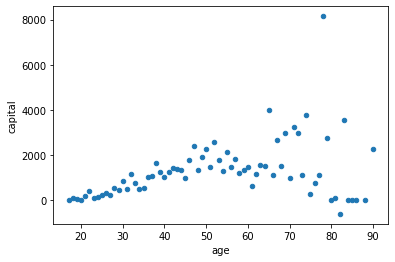

In [58]:
df.groupby("age").mean().reset_index().plot.scatter("age", "capital")

**Calculate the correlation on the whole dataframe**

In [59]:
df.corr()

,age,education_num,capital_gain,capital_loss,hours_per_week,capital
age,1.000000,0.043801,0.080220,0.060161,0.101786,0.076687
education_num,0.043801,1.000000,0.124417,0.079675,0.152776,0.119678
capital_gain,0.080220,0.124417,1.000000,-0.032257,0.080438,0.998520
capital_loss,0.060161,0.079675,-0.032257,1.000000,0.052373,-0.086573
hours_per_week,0.101786,0.152776,0.080438,0.052373,1.000000,0.077327
capital,0.076687,0.119678,0.998520,-0.086573,0.077327,1.000000
